In [15]:
import os
import librosa
from pathlib import Path

from IPython.display import Audio

import matplotlib.pyplot as plt
from scipy.special import expit

from tacotron2.hparams import HParams
from tacotron2.evaluators import BaseEvaluator, EmbeddingEvaluator
from tacotron2.evaluators import get_evaluator, plot_syntesis_result

from resemblyzer import preprocess_wav, VoiceEncoder
%matplotlib inline

In [2]:
DEVICE = 'cpu'

In [3]:
hparams_tacotron = HParams.from_yaml(
    'configs/hparams.ruslan.yaml'
)
#hparams_tacotron.sample_embedding_dim = 256
hparams_tacotron.n_symbols = 152
hparams_tacotron.gate_threshold = 0.4

In [30]:
hparams_wg = HParams.from_yaml(
    '../waveglow/configs/hparams.default.yaml'
)

In [29]:
evaluator = get_evaluator(
    evaluator_classname='BaseEvaluator', 
    encoder_hparams=hparams_tacotron, 
    encoder_checkpoint_path='output/ruslan_stable/models/model_88000.pth', 
    vocoder_hparams=hparams_wg, 
    vocoder_checkpoint_path='/home/e.timofeev/projects/forked/waveglow/models/waveflow_old.pth', 
    use_denoiser=True,
    device=DEVICE)

---

In [6]:
# TAKE_MAX = 4
# #WAV_EMB_FOLDER = '/home/e.timofeev/data/audio/Ruslan16/'
# #WAV_EMB_FOLDER = 'tacotron2/samples/ds/'
# WAV_EMB_FOLDER = '/home/e.timofeev/data/audio/book/Alexandr_Slobodskoy/'
# WAVS_PATHS = [
#     Path(os.path.join(WAV_EMB_FOLDER, x)) 
#     for x in os.listdir(WAV_EMB_FOLDER)[:TAKE_MAX]
#     if x.endswith('.wav')
# ]
# WAVS = [preprocess_wav(x) for x in WAVS_PATHS]

In [7]:
# embedder = VoiceEncoder(device=DEVICE)
# embedding = embedder.embed_speaker(WAVS)
# text = """
# Завтра начнется новый день.
# """

In [9]:
text = """
Завтра начнется новый день.
"""

In [10]:
%%time
audio, (mel_outputs_postnet, gates, alignments) = evaluator.synthesize(text)
# audio, (mel_outputs_postnet, gates, alignments) = evaluator.synthesize(text)

CPU times: user 1min 3s, sys: 2.73 s, total: 1min 5s
Wall time: 5.5 s


In [20]:
audio.numpy().flatten()

array([ 0.00415308,  0.00403276,  0.00393476, ..., -0.0021983 ,
       -0.00174182, -0.00147173], dtype=float32)

In [23]:
Audio(data=audio.cpu().numpy(), rate=22050)

In [32]:
librosa.output.write_wav('./tmp.wav', audio.numpy().flatten(), 22050)

In [33]:
!soxi tmp.wav


Input File     : 'tmp.wav'
Channels       : 1
Sample Rate    : 22050
Precision      : 25-bit
Duration       : 00:00:01.60 = 35328 samples ~ 120.163 CDDA sectors
File Size      : 141k
Bit Rate       : 706k
Sample Encoding: 32-bit Floating Point PCM



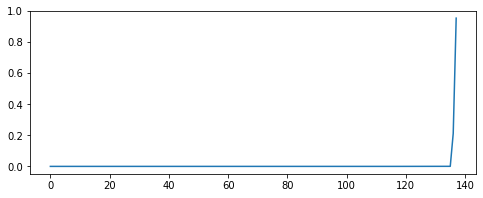

In [12]:
plt.figure(figsize=(8, 3))
plt.plot(expit(gates.cpu().detach().numpy()[0]))

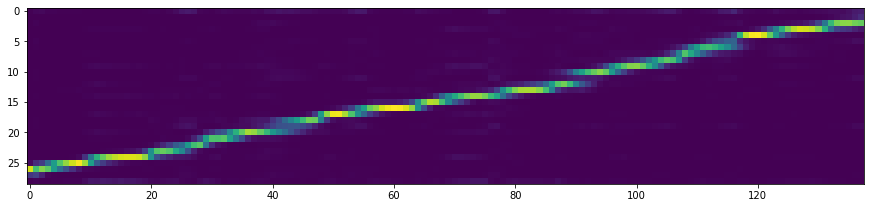

In [13]:
plt.figure(figsize=(15, 15))
plt.imshow(alignments.cpu().detach().numpy()[0].T[::-1])

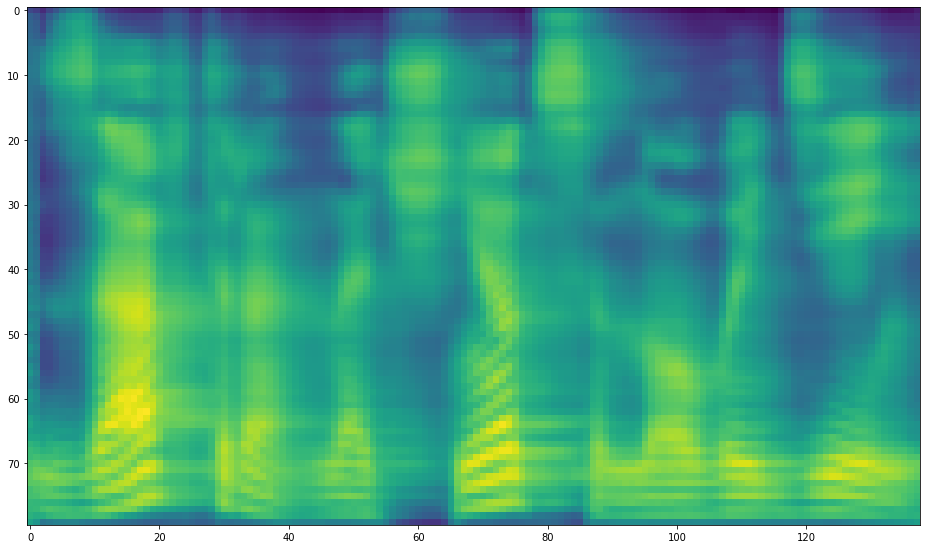

In [14]:
plt.figure(figsize=(16, 16))
plt.imshow(mel_outputs_postnet.cpu().detach().numpy()[0][::-1])